In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
# Load the dataset
file_path = '/Users/sanjayramrajasrinsanjayivasan/Documents/Data Mining project/Final_BankChurners.csv'
data = pd.read_csv(file_path)

data.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [16]:
# Checking for missing values and data types
data_info = {
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum(),
    "Unique Values": data.nunique()
}
pd.DataFrame(data_info)


,Data Types,Missing Values,Unique Values
CLIENTNUM,int64,0,10127
Attrition_Flag,object,0,2
Customer_Age,int64,0,45
Gender,object,0,2
Dependent_count,int64,0,6
Education_Level,object,0,7
Marital_Status,object,0,4
Income_Category,object,0,6
Card_Category,object,0,4
Months_on_book,int64,0,44


In [36]:
#Analyzing Our Target Varaible
distinct_values = data['Attrition_Flag'].unique()
print(distinct_values)

['Existing Customer' 'Attrited Customer']


In [30]:
value_counts = data['Attrition_Flag'].value_counts()

In [31]:
print(value_counts)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


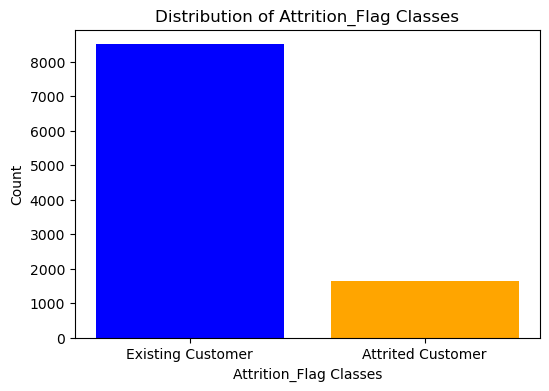

In [21]:
#Histogram to depict the class imbalance
class_counts = data['Attrition_Flag'].value_counts()

# Plotting a histogram to visualize class imbalance
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.xlabel('Attrition_Flag Classes')
plt.ylabel('Count')
plt.title('Distribution of Attrition_Flag Classes')
plt.show()

In [22]:
# Assuming 'data' is your DataFrame
column_names = data.columns.tolist()
print(column_names)

['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [23]:
print(data['Attrition_Flag'])

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object


In [24]:
#Lets Start with Customer Age and their relationship
print(data['Customer_Age'])

0        45
1        49
2        51
3        40
4        40
         ..
10122    50
10123    41
10124    44
10125    30
10126    43
Name: Customer_Age, Length: 10127, dtype: int64


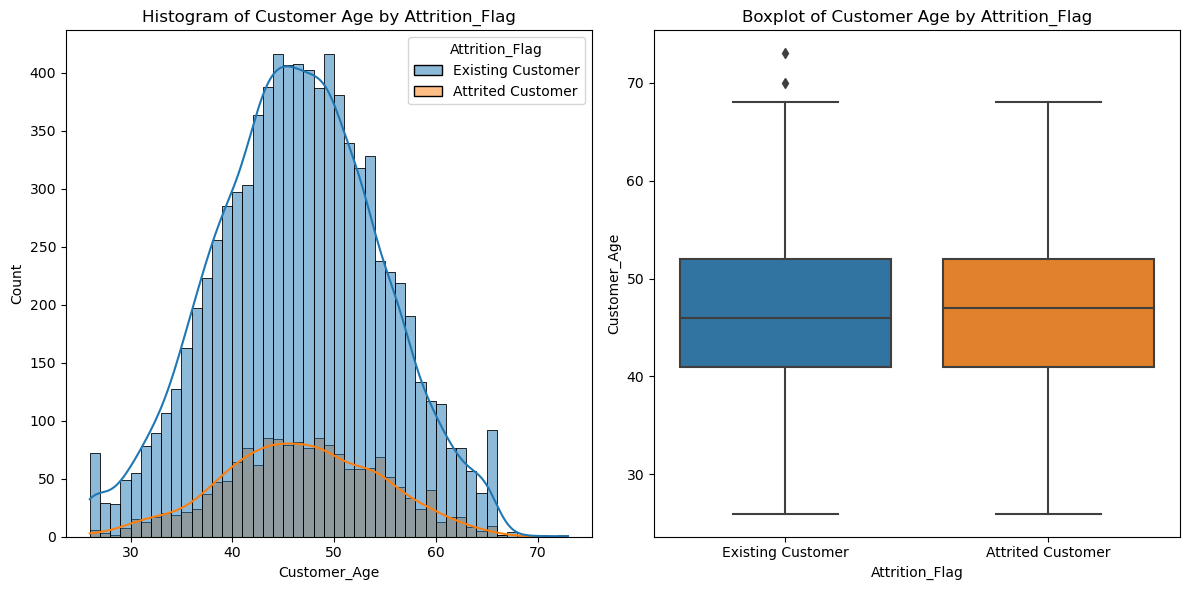

In [25]:
'''In this histplot and boxplot we can see that the age of both exisiting and attrited customers lie between the age group of 40-60. 
We can check multicollinearity with other varaibles for further analysis'''

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns for two plots

sns.histplot(data=data, x='Customer_Age', hue='Attrition_Flag', kde=True, ax=axes[0])
axes[0].set_title('Histogram of Customer Age by Attrition_Flag')

sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=data, ax=axes[1])
axes[1].set_title('Boxplot of Customer Age by Attrition_Flag')

plt.tight_layout()  
plt.show()